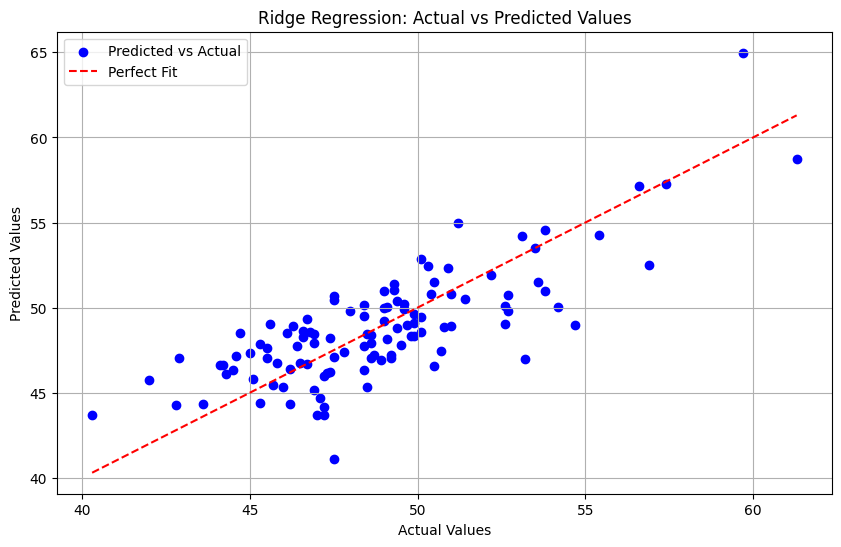

RMSE: 2.2854444080247647
R2: 0.5792087566559632


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# データの標準化
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_ = scaler_X.fit_transform(Xtrain)
y_ = scaler_y.fit_transform(ytrain.reshape(-1, 1)).flatten()

Xval_ = scaler_X.transform(Xval)
yval_ = scaler_y.transform(yval.reshape(-1, 1)).flatten()

# リッジ回帰のモデル定義と学習
model = Ridge(alpha=1.0)  # alphaは正則化パラメータ
model.fit(X_, y_)

# 検証データでの予測
y_hat_ = model.predict(Xval_)

# 予測結果を元のスケールに戻す
y_hat = scaler_y.inverse_transform(y_hat_.reshape(-1, 1)).flatten()
yval = scaler_y.inverse_transform(yval_.reshape(-1, 1)).flatten()

# グラフのプロット
plt.figure(figsize=(10, 6))
plt.scatter(yval, y_hat, color='blue', label='Predicted vs Actual')
plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 評価
rmse = mean_squared_error(yval, y_hat, squared=False)
r2 = r2_score(yval, y_hat)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")


# 新しいセクション

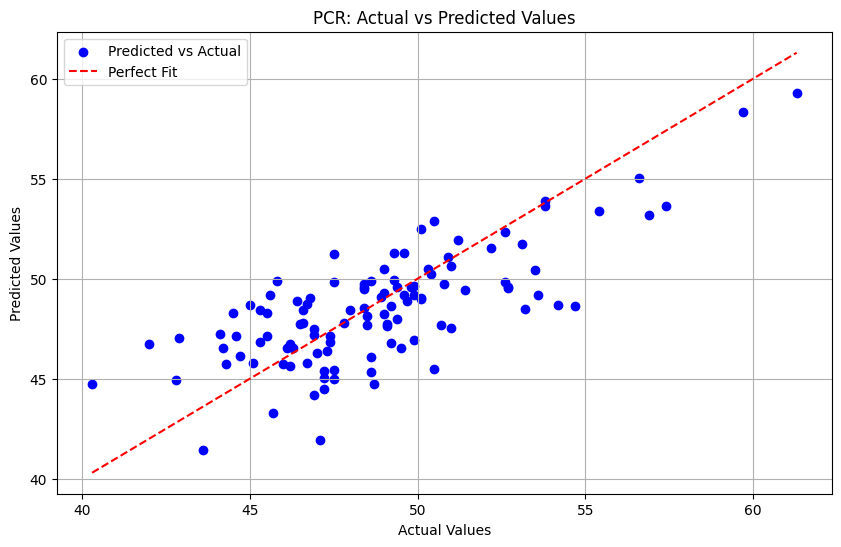

RMSE: 2.353778705682312
R2: 0.5536694346090834


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# データの標準化
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_ = scaler_X.fit_transform(Xtrain)
y_ = scaler_y.fit_transform(ytrain.reshape(-1, 1)).flatten()

Xval_ = scaler_X.transform(Xval)
yval_ = scaler_y.transform(yval.reshape(-1, 1)).flatten()

# 主成分分析 (PCA) による次元削減
pca = PCA(n_components=5)  # 主成分の数を指定
X_pca = pca.fit_transform(X_)

# 線形回帰
model = LinearRegression()
model.fit(X_pca, y_)

# 検証データも同じPCAで変換
Xval_pca = pca.transform(Xval_)

# 予測
y_hat_ = model.predict(Xval_pca)

# 予測結果を元のスケールに戻す
y_hat = scaler_y.inverse_transform(y_hat_.reshape(-1, 1)).flatten()
yval = scaler_y.inverse_transform(yval_.reshape(-1, 1)).flatten()

# グラフのプロット
plt.figure(figsize=(10, 6))
plt.scatter(yval, y_hat, color='blue', label='Predicted vs Actual')
plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('PCR: Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

# 評価
rmse = mean_squared_error(yval, y_hat, squared=False)
r2 = r2_score(yval, y_hat)

print(f"RMSE: {rmse}")
print(f"R2: {r2}")


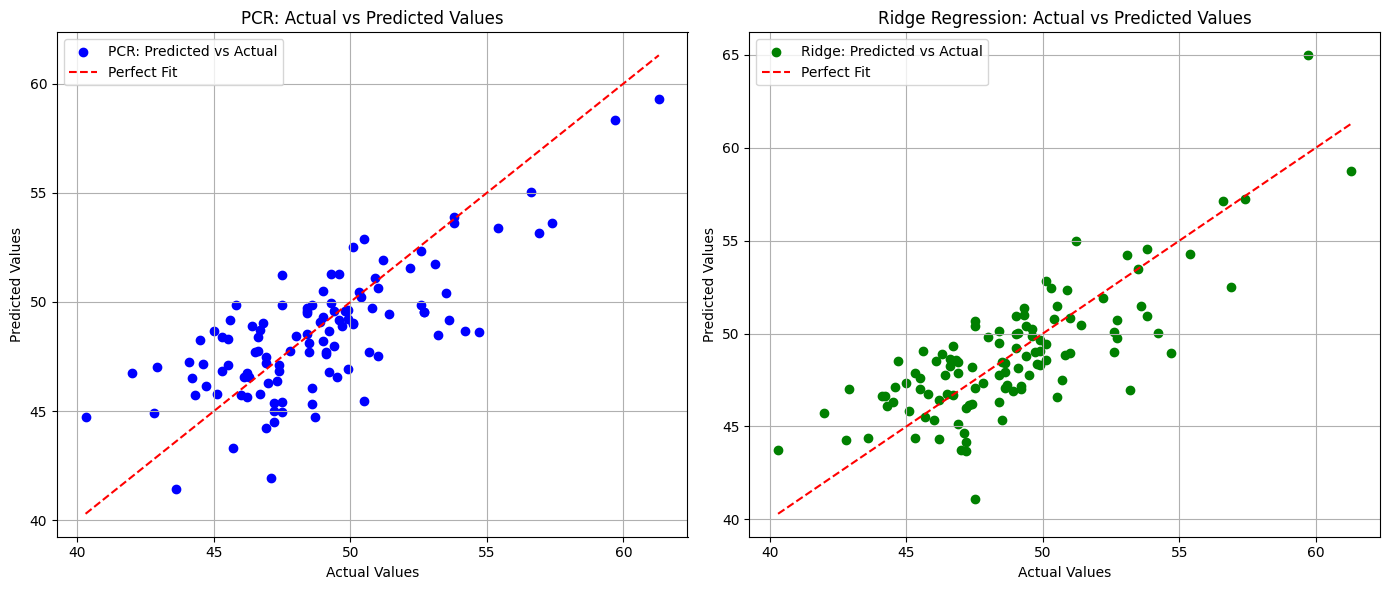

PCR - RMSE: 2.353778705682312, R2: 0.5536694346090834
Ridge - RMSE: 2.2854444080247647, R2: 0.5792087566559632


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# データの標準化
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_ = scaler_X.fit_transform(Xtrain)
y_ = scaler_y.fit_transform(ytrain.reshape(-1, 1)).flatten()

Xval_ = scaler_X.transform(Xval)
yval_ = scaler_y.transform(yval.reshape(-1, 1)).flatten()

# PCR: 主成分分析 + 線形回帰
pca = PCA(n_components=5)  # 主成分の数を指定
X_pca = pca.fit_transform(X_)

pcr_model = LinearRegression()
pcr_model.fit(X_pca, y_)

Xval_pca = pca.transform(Xval_)
y_hat_pcr_ = pcr_model.predict(Xval_pca)
y_hat_pcr = scaler_y.inverse_transform(y_hat_pcr_.reshape(-1, 1)).flatten()
yval = scaler_y.inverse_transform(yval_.reshape(-1, 1)).flatten()

# リッジ回帰
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_, y_)

y_hat_ridge_ = ridge_model.predict(Xval_)
y_hat_ridge = scaler_y.inverse_transform(y_hat_ridge_.reshape(-1, 1)).flatten()

# グラフのプロット
plt.figure(figsize=(14, 6))

# PCRのプロット
plt.subplot(1, 2, 1)
plt.scatter(yval, y_hat_pcr, color='blue', label='PCR: Predicted vs Actual')
plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('PCR: Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# リッジ回帰のプロット
plt.subplot(1, 2, 2)
plt.scatter(yval, y_hat_ridge, color='green', label='Ridge: Predicted vs Actual')
plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 評価
mse_pcr = mean_squared_error(yval, y_hat_pcr)
r2_pcr = r2_score(yval, y_hat_pcr)

mse_ridge = mean_squared_error(yval, y_hat_ridge)
r2_ridge = r2_score(yval, y_hat_ridge)

print(f"PCR - RMSE: {np.sqrt(mse_pcr)}, R2: {r2_pcr}")
print(f"Ridge - RMSE: {np.sqrt(mse_ridge)}, R2: {r2_ridge}")



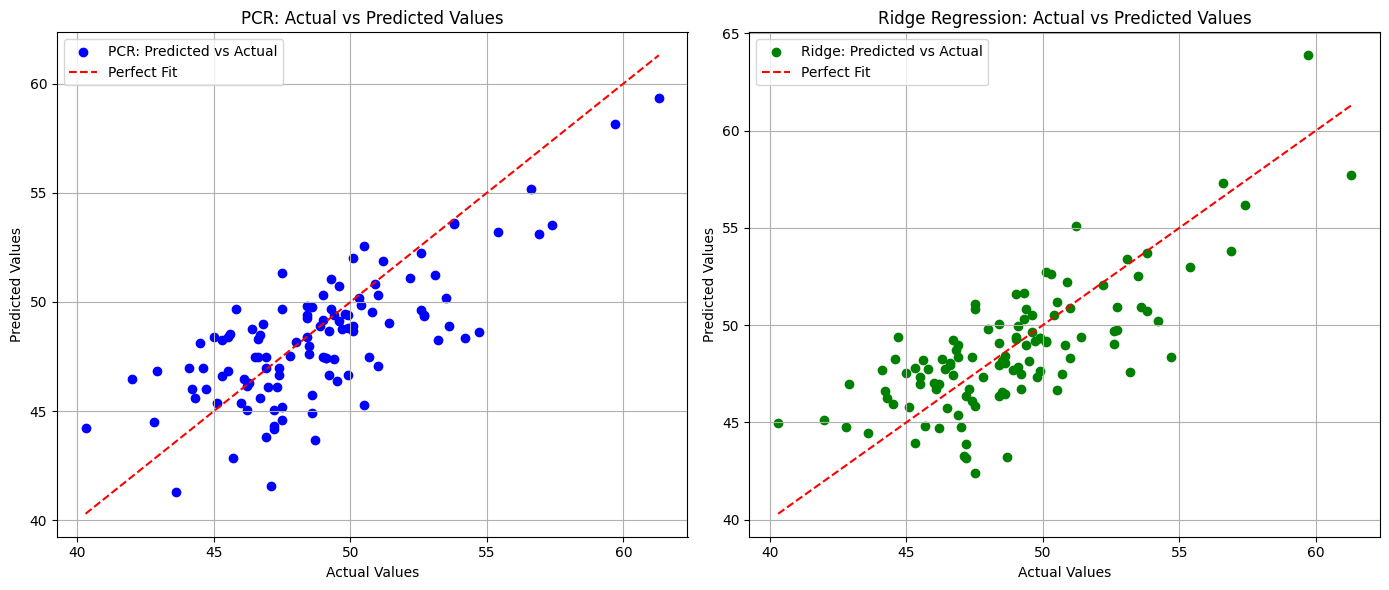

PCR - RMSE: 2.42279722628421, R2: 0.527110680262055
Ridge - RMSE: 2.377773349284219, R2: 0.5445231798082476


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# データの標準化
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_ = scaler_X.fit_transform(Xtrain)
y_ = scaler_y.fit_transform(ytrain.reshape(-1, 1)).flatten()

Xval_ = scaler_X.transform(Xval)
yval_ = scaler_y.transform(yval.reshape(-1, 1)).flatten()

#交差検証、5
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# PCRの結果を保存するためのリスト
pcr_predictions = []
ridge_predictions = []
actual_values = []

for train_index, test_index in kf.split(X_):
    X_train, X_test = X_[train_index], X_[test_index]
    y_train, y_test = y_[train_index], y_[test_index]

    # PCR
    pca = PCA(n_components=5)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    pcr_model = LinearRegression()
    pcr_model.fit(X_train_pca, y_train)
    y_pred_pcr = pcr_model.predict(X_test_pca)
    pcr_predictions.extend(y_pred_pcr)

    # リッジ回帰
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    ridge_predictions.extend(y_pred_ridge)

    # 実際の値
    actual_values.extend(y_test)

# 検証データの予測
Xval_pca = pca.transform(Xval_)
y_hat_pcr_ = pcr_model.predict(Xval_pca)
y_hat_pcr = scaler_y.inverse_transform(y_hat_pcr_.reshape(-1, 1)).flatten()

y_hat_ridge_ = ridge_model.predict(Xval_)
y_hat_ridge = scaler_y.inverse_transform(y_hat_ridge_.reshape(-1, 1)).flatten()
yval = scaler_y.inverse_transform(yval_.reshape(-1, 1)).flatten()

# グラフのプロット
plt.figure(figsize=(14, 6))

# PCRのプロット
plt.subplot(1, 2, 1)
plt.scatter(yval, y_hat_pcr, color='blue', label='PCR: Predicted vs Actual')
plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('PCR: Actual vs Predicted Values')
plt.legend()
plt.grid(True)

# リッジ回帰のプロット
plt.subplot(1, 2, 2)
plt.scatter(yval, y_hat_ridge, color='green', label='Ridge: Predicted vs Actual')
plt.plot([min(yval), max(yval)], [min(yval), max(yval)], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 評価
mse_pcr = mean_squared_error(yval, y_hat_pcr)
r2_pcr = r2_score(yval, y_hat_pcr)

mse_ridge = mean_squared_error(yval, y_hat_ridge)
r2_ridge = r2_score(yval, y_hat_ridge)

print(f"PCR - RMSE: {np.sqrt(mse_pcr)}, R2: {r2_pcr}")
print(f"Ridge - RMSE: {np.sqrt(mse_ridge)}, R2: {r2_ridge}")


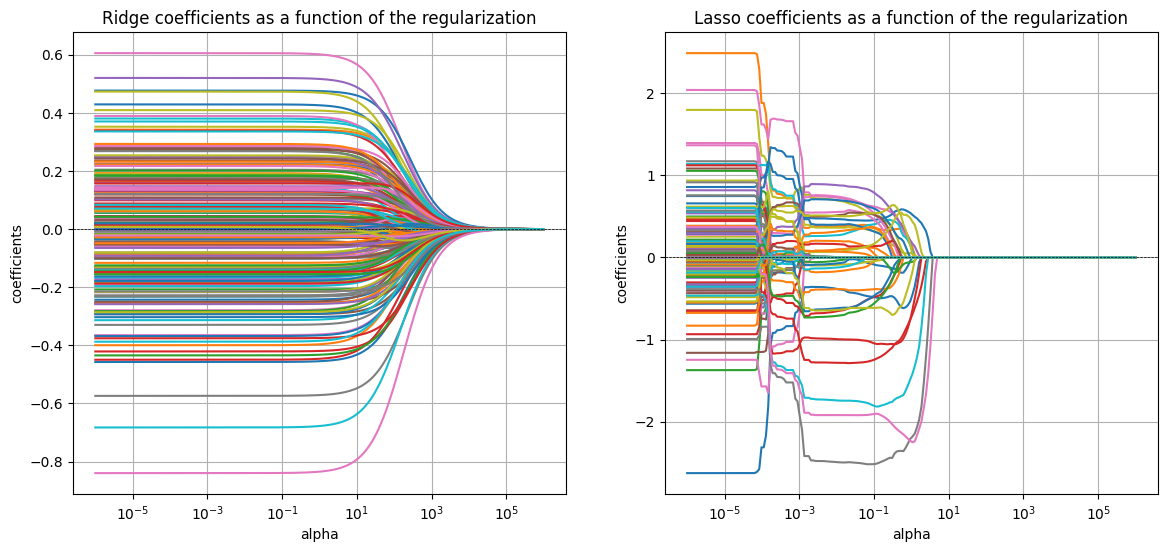

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split

# データ生成
np.random.seed(0)
n_samples, n_features = 50, 200
X = np.random.randn(n_samples, n_features)
coef = 3 * np.random.randn(n_features)

# 10個の特徴量だけを有効にする
inds = np.arange(n_features)
np.random.shuffle(inds)
coef[inds[10:]] = 0  # 10個以降の特徴量の係数を0にする

y = np.dot(X, coef) + np.random.normal(0, 0.1, size=n_samples)

# トレーニングとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 正則化パラメータの範囲を設定
alphas = np.logspace(-6, 6, 200)
ridge_coefs = []
lasso_coefs = []

# リッジ回帰とラッソ回帰を各alphaで実行し、係数を記録
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    lasso = Lasso(alpha=alpha, max_iter=10000)

    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)

    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

# 結果のプロット
plt.figure(figsize=(14, 6))

# リッジ回帰の係数をプロット
plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True)

# ラッソ回帰の係数をプロット
plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid(True)

plt.show()


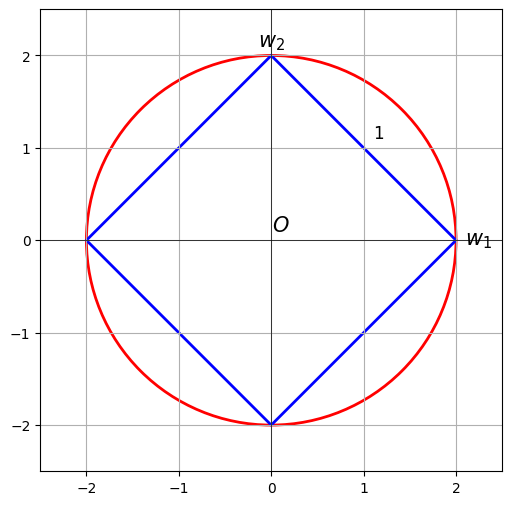

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# グラフの設定
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set_aspect('equal')

# 円（リッジ回帰のL2正則化）
circle = plt.Circle((0, 0), 2, color='red', fill=False, linewidth=2)

# 菱形（ラッソ回帰のL1正則化）
diamond = plt.Polygon([[0, 2], [2, 0], [0, -2], [-2, 0]], color='blue', fill=False, linewidth=2)

# 小さいバージョンの円と菱形
small_circle = plt.Circle((0, 0), 1, color='red', fill=False, linestyle='--')
small_diamond = plt.Polygon([[0, 1], [1, 0], [0, -1], [-1, 0]], color='blue', fill=False, linestyle='--')

# グラフに追加
ax.add_artist(circle)
ax.add_artist(diamond)


# 軸の設定
ax.axhline(0, color='black',linewidth=0.5)
ax.axvline(0, color='black',linewidth=0.5)
plt.xticks(np.arange(-2, 3, 1))
plt.yticks(np.arange(-2, 3, 1))

# ラベルを追加
ax.text(2.1, 0, r'$w_1$', fontsize=15, verticalalignment='center')
ax.text(0, 2.1, r'$w_2$', fontsize=15, horizontalalignment='center')
ax.text(0.1, 0.1, r'$O$', fontsize=15, horizontalalignment='center')
ax.text(1.1, 1.1, r'$1$', fontsize=12, color='black')

# 表示
plt.grid(True)
plt.show()
